In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import geopandas as gpd

In [14]:
#air_quality=pd.read_csv("US_AQI.csv")
air_quality=pd.read_csv("US_AQI.csv")
air_quality

FileNotFoundError: [Errno 2] No such file or directory: 'US_AQI.csv'

In [ ]:
air_quality_1=air_quality.copy()
air_quality_1.drop(["Unnamed: 0","CBSA Code","city_ascii", "state_name"], axis=1, inplace=True)
air_quality_1

,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,state_id,lat,lng,population,density,timezone
0,2022-01-01,21,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
1,2022-01-02,12,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
2,2022-01-03,18,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
3,2022-01-04,19,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
4,2022-01-05,17,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...
5617320,1980-12-27,52,Moderate,CO,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617321,1980-12-28,52,Moderate,CO,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617322,1980-12-29,24,Good,CO,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617323,1980-12-30,14,Good,CO,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix


In [ ]:
aq_2 = air_quality_1.rename(columns={'Defining Parameter': 'def par', 'Number of Sites Reporting': '# sites'})
aq_2

,Date,AQI,Category,def par,# sites,state_id,lat,lng,population,density,timezone
0,2022-01-01,21,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
1,2022-01-02,12,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
2,2022-01-03,18,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
3,2022-01-04,19,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
4,2022-01-05,17,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...
5617320,1980-12-27,52,Moderate,CO,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617321,1980-12-28,52,Moderate,CO,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617322,1980-12-29,24,Good,CO,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617323,1980-12-30,14,Good,CO,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix


In [ ]:
aq_2.drop(aq_2[(aq_2["def par"] == "PM10")].index, inplace= True)
aq_2.drop(aq_2[(aq_2["def par"] == "NO2")].index, inplace= True)
aq_2.drop(aq_2[(aq_2["def par"] == "CO")].index, inplace= True)
aq_2.drop(aq_2[(aq_2["def par"] == "SO2")].index, inplace= True)
aq_2

,Date,AQI,Category,def par,# sites,state_id,lat,lng,population,density,timezone
0,2022-01-01,21,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
1,2022-01-02,12,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
2,2022-01-03,18,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
3,2022-01-04,19,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
4,2022-01-05,17,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...
5617238,1980-09-26,97,Moderate,Ozone,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617239,1980-09-27,129,Unhealthy for Sensitive Groups,Ozone,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617240,1980-09-28,154,Unhealthy,Ozone,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617241,1980-09-29,133,Unhealthy for Sensitive Groups,Ozone,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix


In [ ]:
aq_2.isna()

aq_2["Date"]=aq_2["Date"].fillna("unknown")
aq_2["AQI"]=aq_2["AQI"].fillna("unknown")
aq_2["Category"]=aq_2["Category"].fillna("unknown")
aq_2["def par"]=aq_2["def par"].fillna("unknown")
aq_2["# sites"]=aq_2["# sites"].fillna("unknown")
aq_2["state_id"]=aq_2["state_id"].fillna("unknown")
aq_2["population"]=aq_2["population"].fillna("unknown")
aq_2["density"]=aq_2["density"].fillna("unknown")
aq_2["timezone"]=aq_2["timezone"].fillna("unknown")

aq_2

,Date,AQI,Category,def par,# sites,state_id,lat,lng,population,density,timezone
0,2022-01-01,21,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
1,2022-01-02,12,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
2,2022-01-03,18,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
3,2022-01-04,19,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
4,2022-01-05,17,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...
5617238,1980-09-26,97,Moderate,Ozone,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617239,1980-09-27,129,Unhealthy for Sensitive Groups,Ozone,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617240,1980-09-28,154,Unhealthy,Ozone,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617241,1980-09-29,133,Unhealthy for Sensitive Groups,Ozone,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix


In [ ]:
aq_3=aq_2.copy()
aq_3.drop(aq_3[(aq_3["def par"] == "Ozone")].index, inplace= True)
aq_3

,Date,AQI,Category,def par,# sites,state_id,lat,lng,population,density,timezone
0,2022-01-01,21,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
1,2022-01-02,12,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
2,2022-01-03,18,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
3,2022-01-04,19,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
4,2022-01-05,17,Good,PM2.5,2,WA,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...
4947032,1988-10-05,52,Moderate,PM2.5,16,DC,38.9047,-77.0163,5066973.0,4434.0,America/New_York
4947049,1988-10-22,29,Good,PM2.5,15,DC,38.9047,-77.0163,5066973.0,4434.0,America/New_York
4947053,1988-10-26,53,Moderate,PM2.5,16,DC,38.9047,-77.0163,5066973.0,4434.0,America/New_York
4947116,1988-12-28,53,Moderate,PM2.5,14,DC,38.9047,-77.0163,5066973.0,4434.0,America/New_York


In [ ]:
pm=aq_3["AQI"].value_counts()
pm

,count
AQI,
52,41411
54,34638
55,32877
53,31438
38,31125
...,...
307,1
355,1
430,1


In [ ]:
avg_pm= aq_3["AQI"].mean()
print(avg_pm)

44.283937447354376


In [ ]:
std_pm= aq_3["AQI"].std()
print(std_pm)

23.13559548986974


In [ ]:
high=aq_3.sort_values(by="AQI", ascending=False)
high

,Date,AQI,Category,def par,# sites,state_id,lat,lng,population,density,timezone
322557,2020-09-11,641,Hazardous,PM2.5,2,OR,44.9233,-123.0244,263571.0,1359.0,America/Los_Angeles
795144,2017-09-06,593,Hazardous,PM2.5,3,MT,46.8751,-114.0214,93723.0,839.0,America/Denver
206023,2020-09-11,583,Hazardous,PM2.5,2,OR,44.0563,-121.3095,107460.0,1114.0,America/Los_Angeles
312678,2020-09-12,561,Hazardous,PM2.5,1,OR,44.2985,-120.8607,10429.0,313.0,America/Los_Angeles
240657,2020-09-12,550,Hazardous,PM2.5,7,OR,44.0564,-123.1174,270013.0,1489.0,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...
2285020,2008-02-02,0,Good,PM2.5,1,ID,46.7308,-116.9986,25652.0,1433.0,America/Los_Angeles
1274182,2014-09-13,0,Good,PM2.5,1,HI,20.8715,-156.4603,29993.0,804.0,Pacific/Honolulu
1544448,2012-03-06,0,Good,PM2.5,1,MT,45.7891,-108.5526,116593.0,945.0,America/Denver
2991461,2003-01-30,0,Good,PM2.5,1,WA,46.7223,-122.9696,17473.0,885.0,America/Los_Angeles


In [ ]:
high_10=high.iloc[:10]
high_10

,Date,AQI,Category,def par,# sites,state_id,lat,lng,population,density,timezone
322557,2020-09-11,641,Hazardous,PM2.5,2,OR,44.9233,-123.0244,263571.0,1359.0,America/Los_Angeles
795144,2017-09-06,593,Hazardous,PM2.5,3,MT,46.8751,-114.0214,93723.0,839.0,America/Denver
206023,2020-09-11,583,Hazardous,PM2.5,2,OR,44.0563,-121.3095,107460.0,1114.0,America/Los_Angeles
312678,2020-09-12,561,Hazardous,PM2.5,1,OR,44.2985,-120.8607,10429.0,313.0,America/Los_Angeles
240657,2020-09-12,550,Hazardous,PM2.5,7,OR,44.0564,-123.1174,270013.0,1489.0,America/Los_Angeles
322555,2020-09-09,550,Hazardous,PM2.5,3,OR,44.9233,-123.0244,263571.0,1359.0,America/Los_Angeles
322559,2020-09-13,548,Hazardous,PM2.5,2,OR,44.9233,-123.0244,263571.0,1359.0,America/Los_Angeles
1543913,2012-09-18,546,Hazardous,PM2.5,3,OR,44.0563,-121.3095,107460.0,1114.0,America/Los_Angeles
809023,2017-12-06,537,Hazardous,PM2.5,5,CA,34.1964,-119.1815,378990.0,3023.0,America/Los_Angeles
183464,2021-09-14,537,Hazardous,PM2.5,3,CA,36.3276,-119.3269,235184.0,1354.0,America/Los_Angeles


In [ ]:
high_10_values_1=high_10["state_id"].value_counts() #showing value counts for the states with the highest indexes
high_10_values_1

,count
state_id,
OR,7
CA,2
MT,1


In [ ]:
low=aq_3.sort_values(by="AQI", ascending=True)
low

,Date,AQI,Category,def par,# sites,state_id,lat,lng,population,density,timezone
1347569,2014-05-24,0,Good,PM2.5,1,NM,36.3871,-105.5803,5950.0,381.0,America/Denver
4900305,1988-06-01,0,Good,PM2.5,1,OR,42.2195,-121.7754,21509.0,412.0,America/Los_Angeles
884784,2016-12-01,0,Good,PM2.5,1,MN,46.3553,-94.1983,13423.0,427.0,America/Chicago
2616161,2006-10-24,0,Good,PM2.5,1,MA,42.4517,-73.2605,42514.0,405.0,America/New_York
140794,2021-09-21,0,Good,PM2.5,1,SD,44.3748,-100.3205,13908.0,412.0,America/Chicago
...,...,...,...,...,...,...,...,...,...,...,...
322555,2020-09-09,550,Hazardous,PM2.5,3,OR,44.9233,-123.0244,263571.0,1359.0,America/Los_Angeles
312678,2020-09-12,561,Hazardous,PM2.5,1,OR,44.2985,-120.8607,10429.0,313.0,America/Los_Angeles
206023,2020-09-11,583,Hazardous,PM2.5,2,OR,44.0563,-121.3095,107460.0,1114.0,America/Los_Angeles
795144,2017-09-06,593,Hazardous,PM2.5,3,MT,46.8751,-114.0214,93723.0,839.0,America/Denver


In [ ]:
low_10=low.iloc[:10]
low_10

,Date,AQI,Category,def par,# sites,state_id,lat,lng,population,density,timezone
1347569,2014-05-24,0,Good,PM2.5,1,NM,36.3871,-105.5803,5950.0,381.0,America/Denver
4900305,1988-06-01,0,Good,PM2.5,1,OR,42.2195,-121.7754,21509.0,412.0,America/Los_Angeles
884784,2016-12-01,0,Good,PM2.5,1,MN,46.3553,-94.1983,13423.0,427.0,America/Chicago
2616161,2006-10-24,0,Good,PM2.5,1,MA,42.4517,-73.2605,42514.0,405.0,America/New_York
140794,2021-09-21,0,Good,PM2.5,1,SD,44.3748,-100.3205,13908.0,412.0,America/Chicago
13827,2022-01-25,0,Good,PM2.5,1,TX,33.5657,-101.8879,257835.0,737.0,America/Chicago
474193,2019-05-20,0,Good,PM2.5,1,SD,44.3748,-100.3205,13908.0,412.0,America/Chicago
1107648,2015-01-19,0,Good,PM2.5,1,AK,58.4546,-134.1739,32099.0,4.0,America/Juneau
2616162,2006-10-25,0,Good,PM2.5,1,MA,42.4517,-73.2605,42514.0,405.0,America/New_York
459374,2019-05-26,0,Good,PM2.5,1,ID,46.7308,-116.9986,25652.0,1433.0,America/Los_Angeles


In [ ]:
aq_4=aq_2.copy()
aq_4.drop(aq_4[(aq_4["def par"] == "PM2.5")].index, inplace= True)
aq_4

,Date,AQI,Category,def par,# sites,state_id,lat,lng,population,density,timezone
90,2022-03-01,37,Good,Ozone,3,OH,41.0798,-81.5219,570375.0,1230.0,America/New_York
92,2022-03-03,39,Good,Ozone,5,OH,41.0798,-81.5219,570375.0,1230.0,America/New_York
93,2022-03-04,39,Good,Ozone,3,OH,41.0798,-81.5219,570375.0,1230.0,America/New_York
94,2022-03-05,54,Moderate,Ozone,3,OH,41.0798,-81.5219,570375.0,1230.0,America/New_York
95,2022-03-06,44,Good,Ozone,5,OH,41.0798,-81.5219,570375.0,1230.0,America/New_York
...,...,...,...,...,...,...,...,...,...,...,...
5617238,1980-09-26,97,Moderate,Ozone,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617239,1980-09-27,129,Unhealthy for Sensitive Groups,Ozone,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617240,1980-09-28,154,Unhealthy,Ozone,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617241,1980-09-29,133,Unhealthy for Sensitive Groups,Ozone,1,AZ,32.5995,-114.5491,137612.0,311.0,America/Phoenix


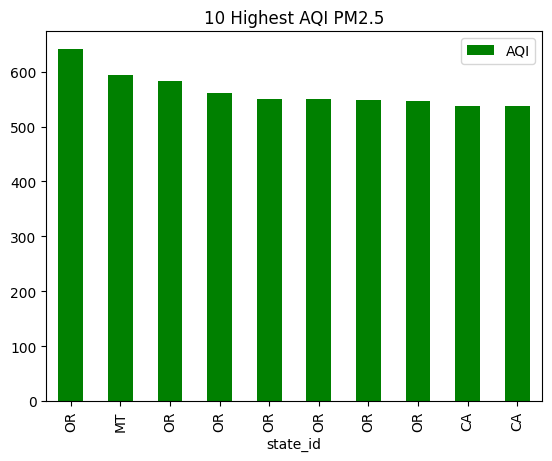

In [ ]:
high_g=high_10.plot(kind="bar",color="green", x="state_id", y="AQI", title="10 Highest AQI PM2.5")
plt.show()

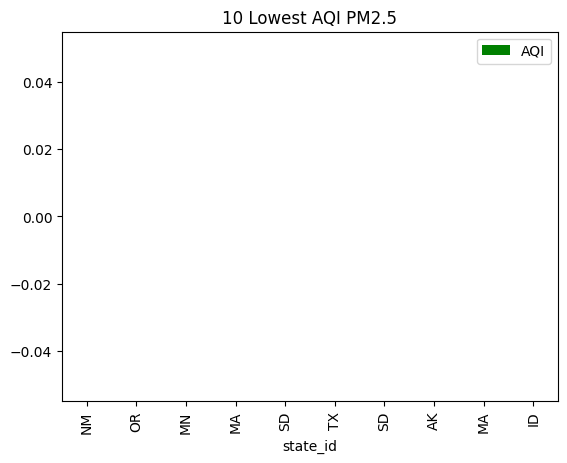

In [ ]:
low_g=low_10.plot(kind="bar",color="green", x="state_id", y="AQI", title="10 Lowest AQI PM2.5")
plt.show()

In [ ]:
oz=aq_4["AQI"].value_counts()
oz

,count
AQI,
44,152978
31,129617
37,85558
40,83353
39,82566
...,...
142,1
396,1
231,1


In [ ]:
avg_oz= aq_4["AQI"].mean()
print(avg_oz)

51.6466034529878


In [ ]:
std_oz= aq_4["AQI"].std()
print(std_oz)

32.38177916836343


In [ ]:
highest=aq_4.sort_values(by="AQI", ascending=False)
highest

,Date,AQI,Category,def par,# sites,state_id,lat,lng,population,density,timezone
285393,2020-08-24,396,Hazardous,Ozone,1,PR,18.2003,-67.1397,93426.0,1101.0,America/Puerto_Rico
4920847,1988-03-06,388,Hazardous,Ozone,13,PA,40.4397,-79.9763,1719289.0,2100.0,America/New_York
5576798,1980-09-30,386,Hazardous,Ozone,24,CA,34.1141,-118.4068,12531334.0,3267.0,America/Los_Angeles
5539705,1980-06-11,357,Hazardous,Ozone,3,PA,40.5961,-75.4756,688658.0,2664.0,America/New_York
5304871,1983-08-29,346,Hazardous,Ozone,2,TN,35.0660,-85.2481,404766.0,491.0,America/New_York
...,...,...,...,...,...,...,...,...,...,...,...
3777572,1998-12-30,0,Good,Ozone,1,MD,38.3756,-75.5865,108982.0,920.0,America/New_York
5615135,1980-12-01,0,Good,Ozone,1,PA,41.2399,-77.0370,28437.0,1250.0,America/New_York
5615141,1980-12-07,0,Good,Ozone,1,PA,41.2399,-77.0370,28437.0,1250.0,America/New_York
5595930,1980-01-18,0,Good,Ozone,1,VA,37.2785,-79.9581,216388.0,900.0,America/New_York


In [ ]:
highest_10=highest.iloc[:20]
highest_10

,Date,AQI,Category,def par,# sites,state_id,lat,lng,population,density,timezone
285393,2020-08-24,396,Hazardous,Ozone,1,PR,18.2003,-67.1397,93426.0,1101.0,America/Puerto_Rico
4920847,1988-03-06,388,Hazardous,Ozone,13,PA,40.4397,-79.9763,1719289.0,2100.0,America/New_York
5576798,1980-09-30,386,Hazardous,Ozone,24,CA,34.1141,-118.4068,12531334.0,3267.0,America/Los_Angeles
5539705,1980-06-11,357,Hazardous,Ozone,3,PA,40.5961,-75.4756,688658.0,2664.0,America/New_York
5304871,1983-08-29,346,Hazardous,Ozone,2,TN,35.0660,-85.2481,404766.0,491.0,America/New_York
5595822,1980-10-02,336,Hazardous,Ozone,17,CA,33.9381,-117.3949,2112239.0,1556.0,America/Los_Angeles
5576800,1980-10-02,336,Hazardous,Ozone,24,CA,34.1141,-118.4068,12531334.0,3267.0,America/Los_Angeles
5576799,1980-10-01,306,Hazardous,Ozone,24,CA,34.1141,-118.4068,12531334.0,3267.0,America/Los_Angeles
5434508,1982-09-01,300,Very Unhealthy,Ozone,14,CA,33.9381,-117.3949,2112239.0,1556.0,America/Los_Angeles
5595817,1980-09-27,300,Very Unhealthy,Ozone,17,CA,33.9381,-117.3949,2112239.0,1556.0,America/Los_Angeles


In [4]:
lowest=aq_4.sort_values(by="AQI", ascending=True)
lowest

NameError: name 'aq_4' is not defined

In [3]:
lowest_10=lowest.iloc[:10]
lowest_10

NameError: name 'lowest' is not defined

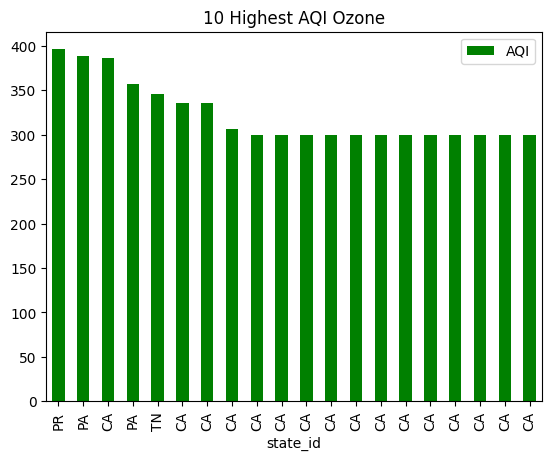

In [ ]:
highest_g=highest_10.plot(kind="bar",color="green", x="state_id", y="AQI", title="10 Highest AQI Ozone")
plt.show()

In [2]:
lowest_g=lowest_10.plot(kind="bar",color="green", x="state_id", y="AQI", title="10 Lowest AQI Ozone")
plt.show()

NameError: name 'lowest_10' is not defined

Analysis of Temporal Trends

Generate state-wise heatmaps of PM2.5 and Ozone levels.

<ipython-input-31-851cd236fbdd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ozone_data, x='state_id', y='AQI', order=state_order, palette='coolwarm')


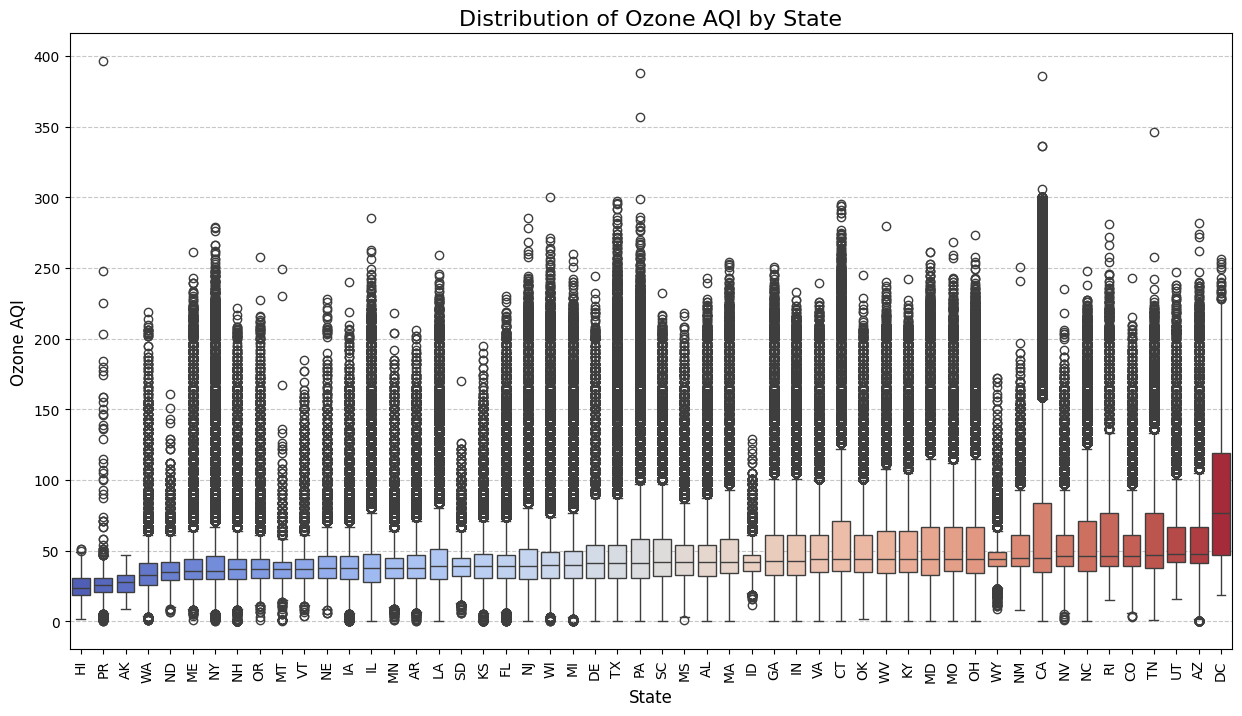

In [ ]:
ozone_data = aq_2[aq_2['def par'] == 'Ozone']

state_order = ozone_data.groupby('state_id')['AQI'].median().sort_values(ascending=True).index

plt.figure(figsize=(15, 8))
sns.boxplot(data=ozone_data, x='state_id', y='AQI', order=state_order, palette='coolwarm')

plt.title('Distribution of Ozone AQI by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Ozone AQI', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<ipython-input-32-4b7bf3644783>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ozone_data[ozone_data['state_id'].isin(top_states_ozone)], x='state_id', y='AQI', palette='Reds')


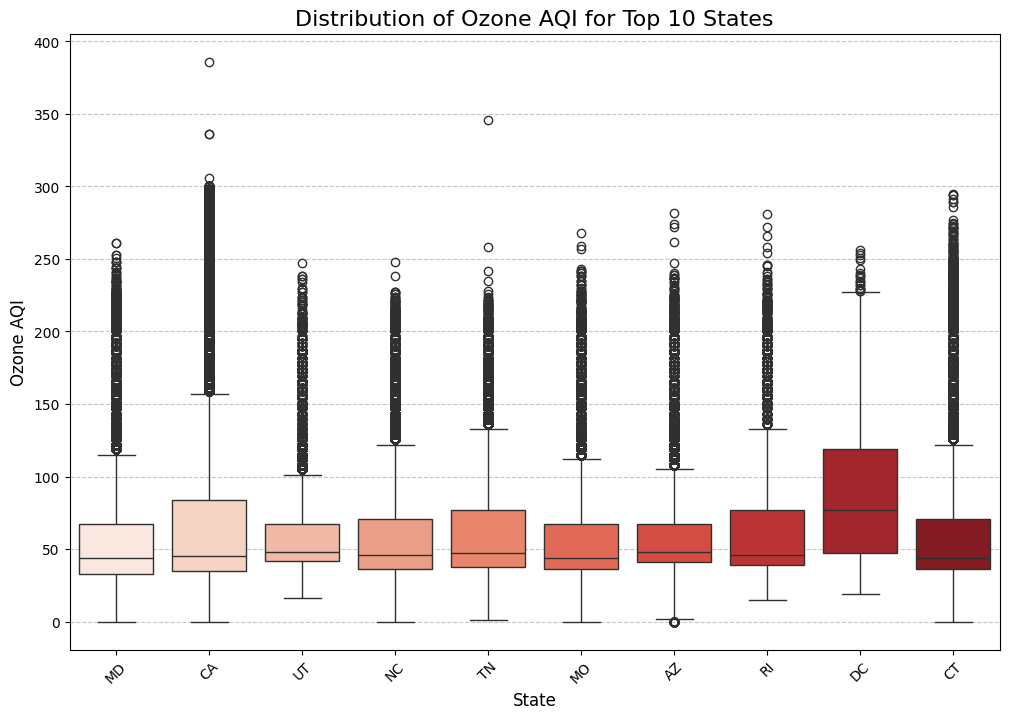

In [ ]:
# The Top 10 states with highest average ozone AQI
top_states_ozone = ozone_data.groupby('state_id')['AQI'].mean().sort_values(ascending=False).head(10).index

plt.figure(figsize=(12, 8))
sns.boxplot(data=ozone_data[ozone_data['state_id'].isin(top_states_ozone)], x='state_id', y='AQI', palette='Reds')

plt.title('Distribution of Ozone AQI for Top 10 States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Ozone AQI', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('distribution_ozone_AQI_top_10')

plt.show()

<ipython-input-33-ad1e29533d5f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ozone_data[ozone_data['state_id'].isin(bottom_states_ozone)], x='state_id', y='AQI', palette='Blues')


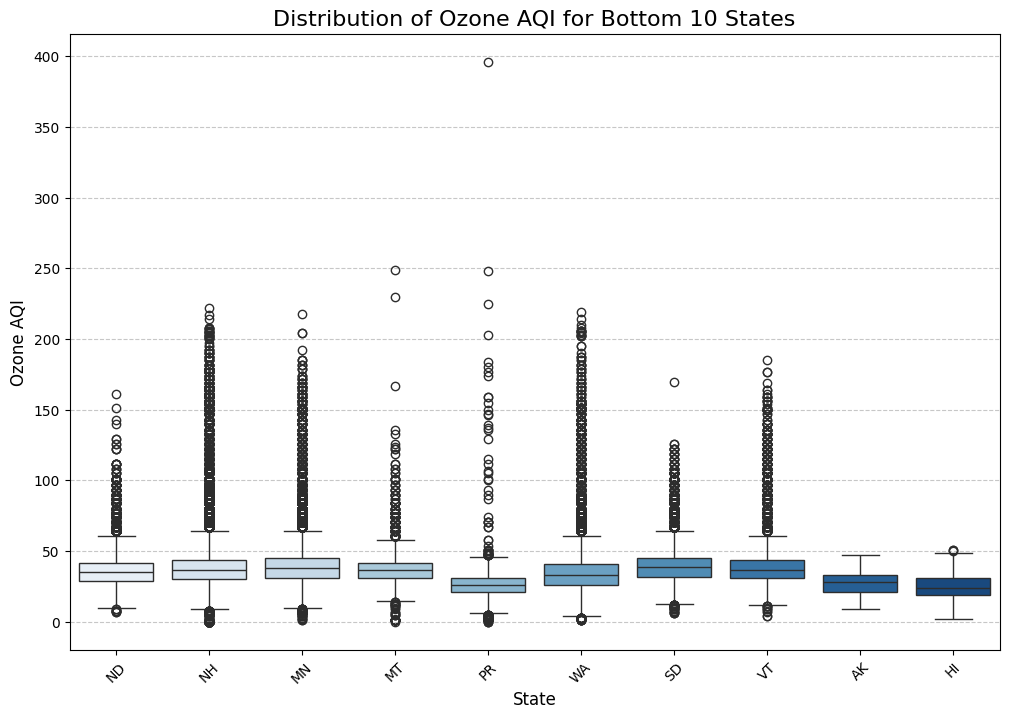

In [ ]:
# The bottom 10 states with lowest average ozone AQI
bottom_states_ozone = ozone_data.groupby('state_id')['AQI'].mean().sort_values().head(10).index

plt.figure(figsize=(12, 8))
sns.boxplot(data=ozone_data[ozone_data['state_id'].isin(bottom_states_ozone)], x='state_id', y='AQI', palette='Blues')

plt.title('Distribution of Ozone AQI for Bottom 10 States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Ozone AQI', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-34-483ec73e0f16>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pm_data, x='state_id', y='AQI', order=state_order, palette='coolwarm')


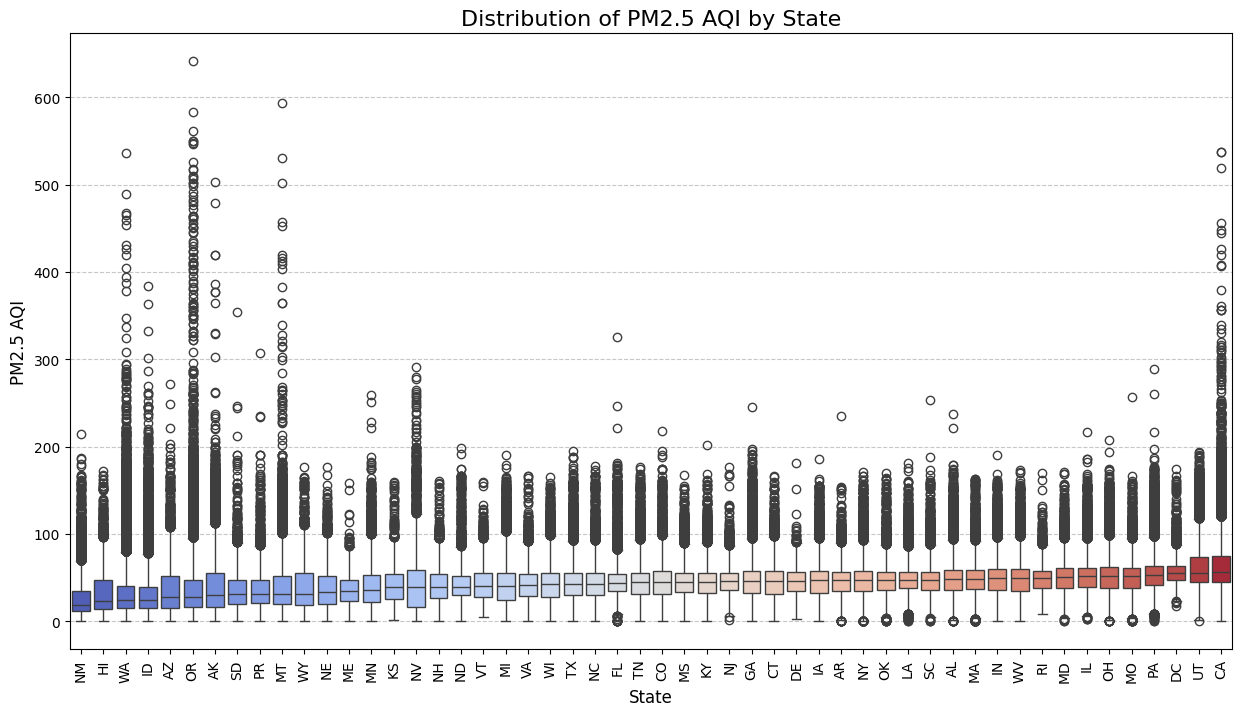

In [ ]:
pm_data = aq_2[aq_2['def par'] == 'PM2.5']

state_order = pm_data.groupby('state_id')['AQI'].median().sort_values(ascending=True).index

plt.figure(figsize=(15, 8))
sns.boxplot(data=pm_data, x='state_id', y='AQI', order=state_order, palette='coolwarm')

plt.title('Distribution of PM2.5 AQI by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('PM2.5 AQI', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
# The Top 10 states with highest average PM2.5 AQI
top_states_pm = pm_data.groupby('state_id')['AQI'].mean().sort_values(ascending=False).head(10).index

plt.figure(figsize=(12, 8))
sns.boxplot(data=pm_data[pm_data['state_id'].isin(top_states_pm)], x='state_id', y='AQI', palette='Reds')

plt.title('Distribution of PM2.5 AQI for Top 10 States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('PM2.5 AQI', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-36-cb6a4cdc6594>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pm_data[pm_data['state_id'].isin(bottom_states_pm)], x='state_id', y='AQI', palette='Blues')


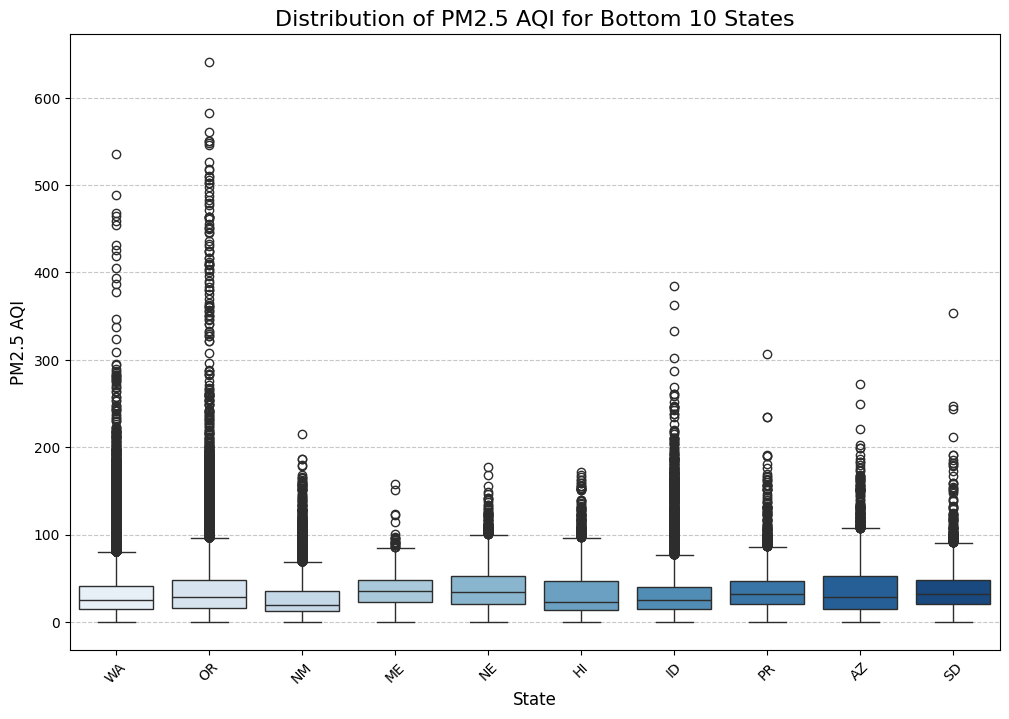

In [ ]:
# The bottom 10 states with lowest average PM2.5 AQI
bottom_states_pm = pm_data.groupby('state_id')['AQI'].mean().sort_values().head(10).index

plt.figure(figsize=(12, 8))
sns.boxplot(data=pm_data[pm_data['state_id'].isin(bottom_states_pm)], x='state_id', y='AQI', palette='Blues')

plt.title('Distribution of PM2.5 AQI for Bottom 10 States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('PM2.5 AQI', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-37-dbf55c0103cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm2_data['Date'] = pd.to_datetime(pm2_data['Date'])
<ipython-input-37-dbf55c0103cd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm2_data['Year'] = pm2_data['Date'].dt.year


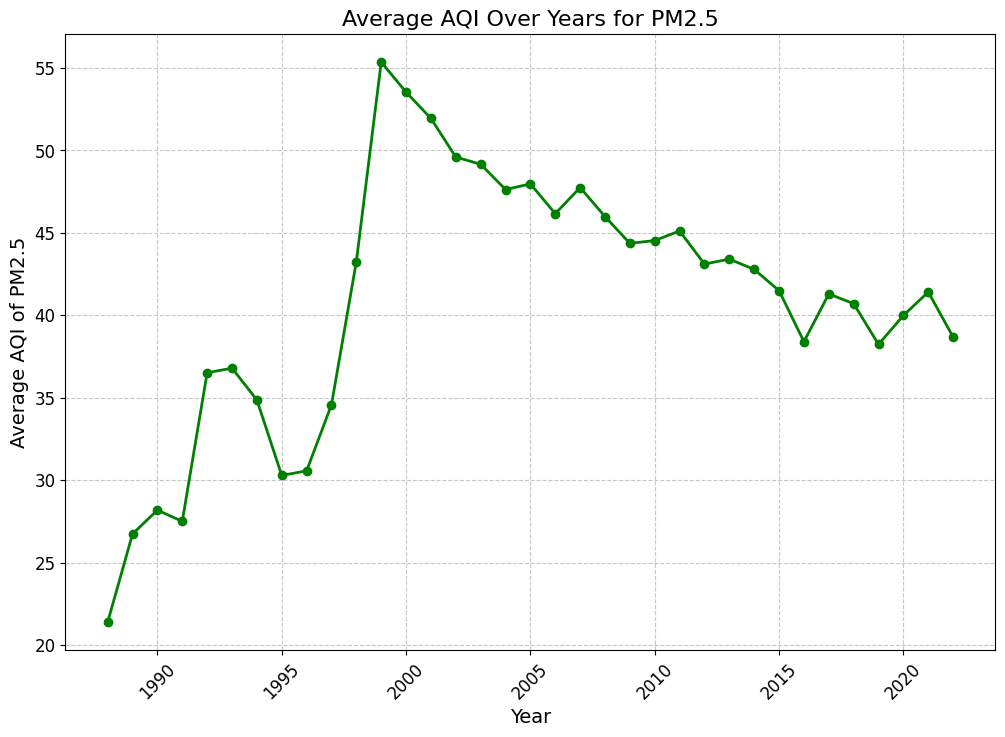

In [ ]:
# Analyze Average AQI for PM2.5 Over the Years in the USA
pm2_data = aq_2[aq_2['def par'] == 'PM2.5']

pm2_data['Date'] = pd.to_datetime(pm2_data['Date'])
pm2_data['Year'] = pm2_data['Date'].dt.year

average_aqi_by_year_pm25 = pm2_data.groupby('Year')['AQI'].mean()

plt.figure(figsize=(12, 8))
average_aqi_by_year_pm25.plot(kind='line', marker='o', color='green', linewidth=2)

plt.title('Average AQI Over Years for PM2.5', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average AQI of PM2.5', fontsize=14)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()



<ipython-input-38-5e3f5176c69d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ozone2_data['Date'] = pd.to_datetime(ozone2_data['Date'])
<ipython-input-38-5e3f5176c69d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ozone2_data['Year'] = ozone2_data['Date'].dt.year


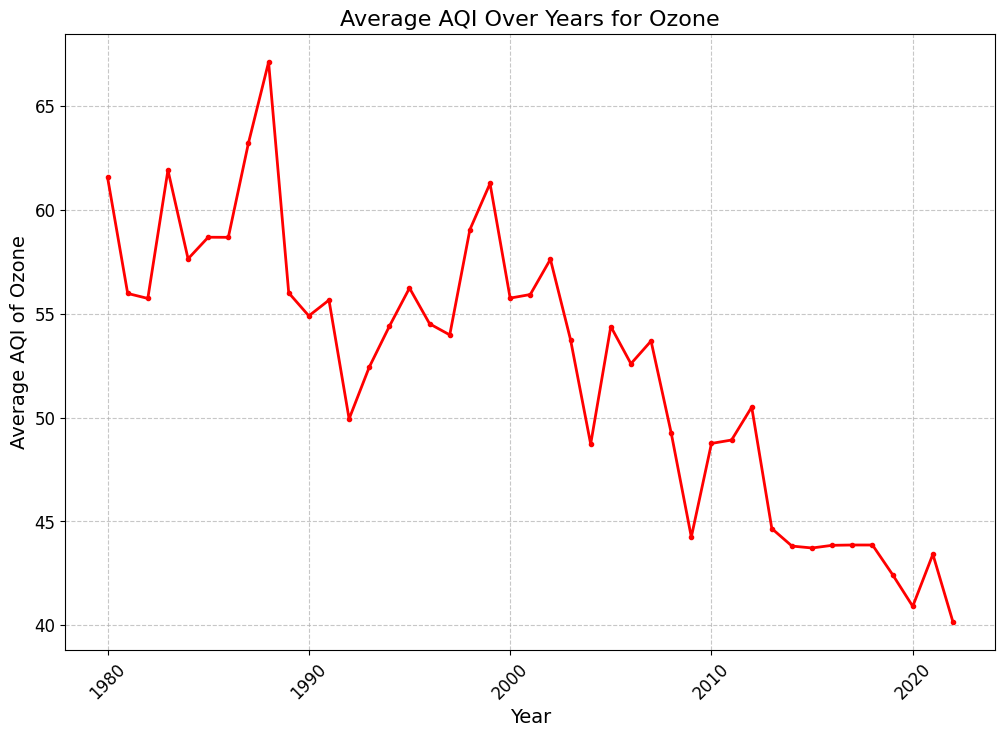

In [ ]:
# Analyze Average AQI for Ozone Over the Years in the USA
ozone2_data = aq_2[aq_2['def par'] == 'Ozone']

ozone2_data['Date'] = pd.to_datetime(ozone2_data['Date'])
ozone2_data['Year'] = ozone2_data['Date'].dt.year

average_aqi_by_year_ozone = ozone2_data.groupby('Year')['AQI'].mean()

plt.figure(figsize=(12, 8))
average_aqi_by_year_ozone.plot(kind='line', marker='.', color='red', linewidth=2)

plt.title('Average AQI Over Years for Ozone', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average AQI of Ozone', fontsize=14)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

<Figure size 2000x3000 with 0 Axes>

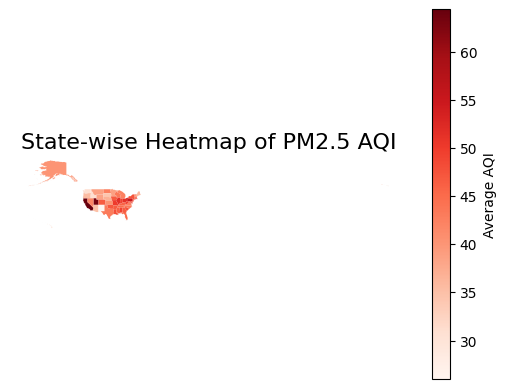

<Figure size 2000x3000 with 0 Axes>

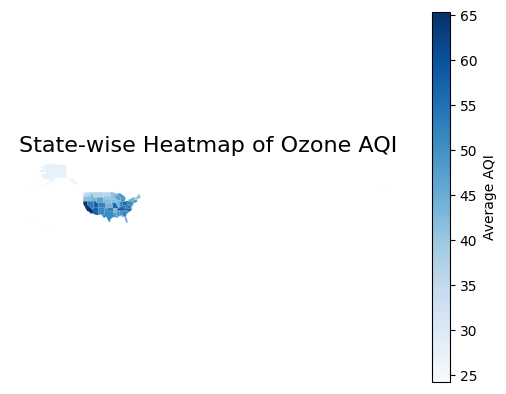

In [ ]:
# Data Cleaning
air_quality = air_quality[air_quality["Defining Parameter"].isin(["PM2.5", "Ozone"])]
air_quality["AQI"] = pd.to_numeric(air_quality["AQI"], errors="coerce")

# Load US states shapefile from Natural Earth (downloaded manually)
shapefile_path = '/content/ne_10m_admin_1_states_provinces.zip'
gdf_states = gpd.read_file(shapefile_path)


# Filter for US states only
gdf_states = gdf_states[gdf_states['admin'] == 'United States of America']
gdf_states = gdf_states.rename(columns={'name': 'state_name'})

# Map state names in shapefile to abbreviations in the data
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
gdf_states['state_id'] = gdf_states['state_name'].map(state_abbreviations)

# Aggregate AQI data by state and parameter
def aggregate_aqi(data, parameter):
    return data[data["Defining Parameter"] == parameter].groupby("state_id")["AQI"].mean()

pm25_aqi = aggregate_aqi(air_quality, "PM2.5")
ozone_aqi = aggregate_aqi(air_quality, "Ozone")

# Merge AQI data with GeoDataFrame
gdf_pm25 = gdf_states.merge(pm25_aqi, on='state_id', how='left')
gdf_ozone = gdf_states.merge(ozone_aqi, on='state_id', how='left')

# Plot heatmap function
def plot_us_heatmap(gdf, column, title, cmap):
    plt.figure(figsize=(20, 30))
    gdf.plot(
        column=column,
        cmap=cmap,
        legend=True,
        legend_kwds={'label': f"Average {column}", 'orientation': "vertical"},
        missing_kwds={"color": "lightgrey", "label": "No Data"}
    )
    plt.title(title, fontsize=16)
    plt.axis("off")
    plt.show()

# Plot PM2.5 heatmap
plot_us_heatmap(gdf_pm25, "AQI", "State-wise Heatmap of PM2.5 AQI", "Reds")

# Plot Ozone heatmap
plot_us_heatmap(gdf_ozone, "AQI", "State-wise Heatmap of Ozone AQI", "Blues")

